<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/AnaliseSerieTemporal/analiseserietemporalpH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time
import matplotlib as mpl
import os
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_percentage_error

In [20]:


if __name__ == "__main__":

    json_file = open("bancotestelstmparaanalisedeserietemporal.json")
    dic = json.load(json_file)
   
    arr = []

    for item in dic:
        arr.append(dic[item])


In [21]:
for item in arr: 
        
        item['Humidity'] = item['Humidity'].split(":")[1].split("}")[0]
        item['Temperature'] = item['Temperature'].split(":")[1].split("}")[0]
        item['Time'] = item['Time'].split(":")[1].split("}")[0].replace('"', '')
        item['pH'] = item['pH'].split(":")[1].split("}")[0]
        item['pHpred'] = item['pHpred'].split(":")[1].split("}")[0]

print(arr)

[{'Humidity': '22.0', 'Temperature': '27.5', 'Time': '2023-03-07 22', 'pH': '7.06', 'pHpred': '6.8591123'}, {'Humidity': '10.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.111'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '6.963046'}, {'Humidity': '9.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.12', 'pHpred': '6.9948'}, {'Humidity': '72.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.1', 'pHpred': '6.7748847'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.160022'}, {'Humidity': '16.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.031192'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.12', 'pHpred': '6.986867'}, {'Humidity': '168.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '6.851901'}, {'Humidity': '25.0', 'Temperature': '2

In [22]:

dfra = pd.DataFrame(columns=['Humidity', 'Temperature', 'Time', 'pH', 'pHpred'])
dfra = dfra.append(arr, ignore_index=True)
dfra.to_csv('bancotestelstmparaanalisedeserietemporal.csv', index=False)
print(dfra)


     Humidity Temperature           Time      pH     pHpred
0        22.0        27.5  2023-03-07 22    7.06  6.8591123
1        10.0       27.56  2023-03-07 22    7.11      7.111
2       176.0       27.56  2023-03-07 22    7.11   6.963046
3         9.0       27.56  2023-03-07 22    7.12     6.9948
4        72.0       27.56  2023-03-07 22     7.1  6.7748847
...       ...         ...            ...     ...        ...
2771    176.0        26.0  2023-03-21 15  8.9453     8.8855
2772    176.0        26.0  2023-03-21 15  8.9452     8.9886
2773    176.0        26.0  2023-03-21 15  8.9844    8.94426
2774    176.0        26.0  2023-03-21 15  8.9866    8.89944
2775    176.0        26.0  2023-03-21 15  8.9945    8.87455

[2776 rows x 5 columns]


<ipython-input-22-34af79e6359a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfra = dfra.append(arr, ignore_index=True)


In [23]:
dfra['Humidity'] = dfra['Humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['Temperature'] = dfra['Temperature'].astype(float)
dfra['pHpred'] = dfra['pHpred'].astype(float)
dfra['Time'] = pd.to_datetime(dfra['Time'], format='%Y-%m-%d %H:%M:%S')


 
humi = dfra['Humidity']
temp = dfra['Temperature']
pH = dfra['pH']
pHpred = dfra['pHpred']
time = dfra['Time']

In [24]:
## features 

features_3 = ['pH', 'pHpred']

features = dfra[features_3]
features.index = dfra['Time']
features.head()



,pH,pHpred
Time,,
2023-03-07 22:00:00,7.06,6.859112
2023-03-07 22:00:00,7.11,7.111000
2023-03-07 22:00:00,7.11,6.963046
2023-03-07 22:00:00,7.12,6.994800
2023-03-07 22:00:00,7.10,6.774885


In [25]:
mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.grid'] = False
     

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>], dtype=object)

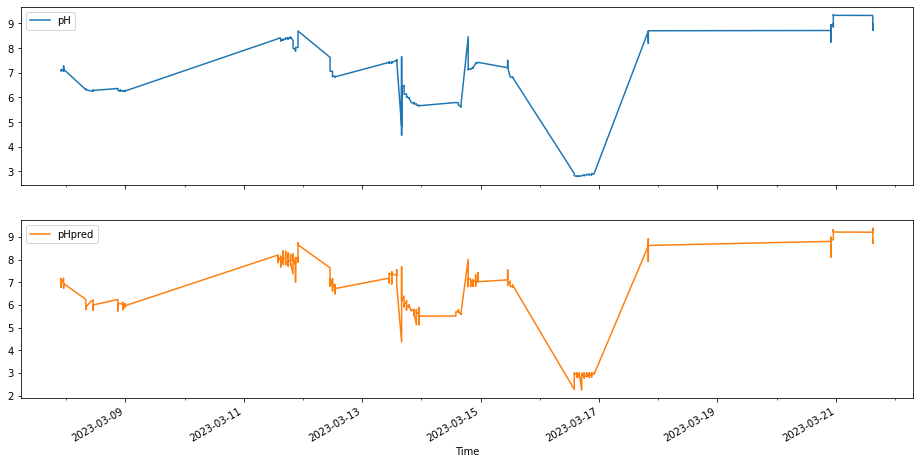

In [26]:
features.plot(subplots=True)

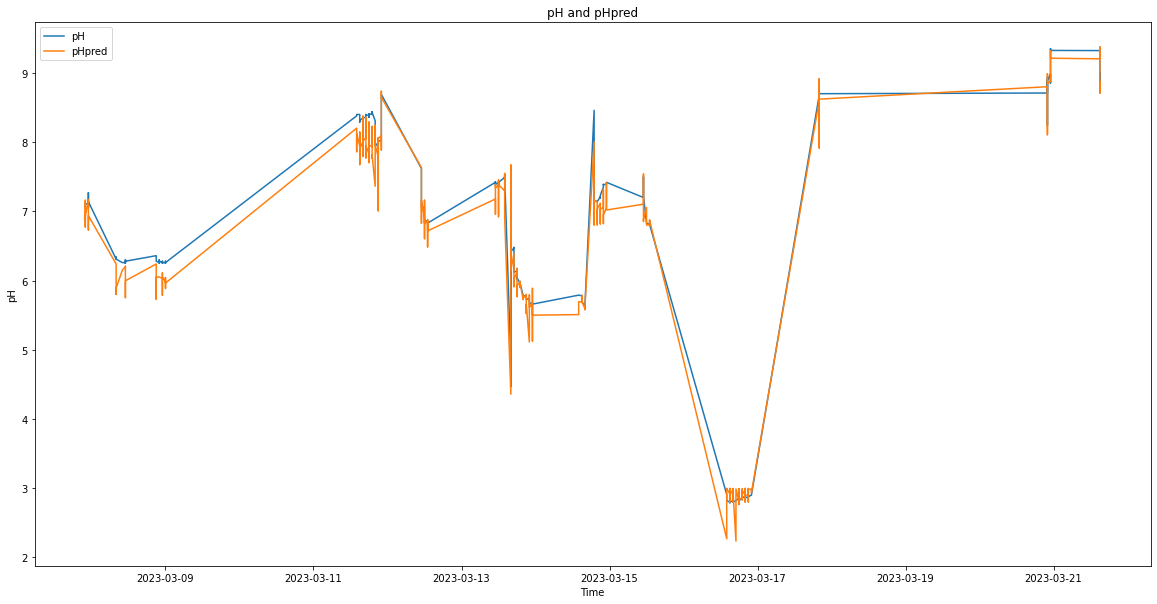

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, pH, label='pH')
ax.plot(time, pHpred, label='pHpred')
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('pH and pHpred')
ax.legend()
plt.show()

In [28]:
# metricas de erro previsão da serie temporal
print('mean_absolute_error', mean_absolute_error(pH, pHpred))
print('mean_squared_log_error', mean_squared_log_error(pH, pHpred))
print('mean_squared_error', mean_squared_error(pH, pHpred))
print('r2_score', r2_score(pH, pHpred))
print(' mean_absolute_percentage_error', mean_absolute_percentage_error(pH, pHpred))


mean_absolute_error 0.179678682863794
mean_squared_log_error 0.0009801922547682236
mean_squared_error 0.05719997898204034
r2_score 0.9814352639933589
 mean_absolute_percentage_error 0.027857679208889853


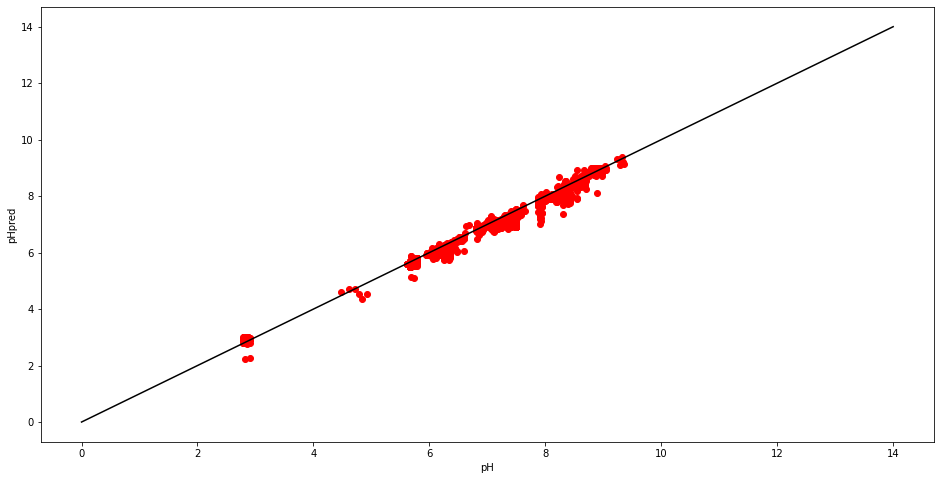

In [29]:
#grafico de perda erro
plt.plot(pH, pHpred, 'ro')
plt.plot([0, 14], [0, 14], 'k-')
plt.xlabel('pH')
plt.ylabel('pHpred')
plt.show()
